# Validity of using prescription records to identify patient comorbidities
## Analysis of hypothyroidism

**ReadMe:**
- This is a script used in the analysis for Schnier et al., 2025: Validity of using prescription records to classify disease – a record linkage study using routinely collected electronic health records from the UK.
- The underlying data set has been created using the Optimum Patient Care Research Database (https://opcrd.optimumpatientcare.org/). The authors do not have permission to give the public access to the study dataset; researchers may request access to OPCRD for their own purposes. 
 - All code is run in StataSE 18. 


**Set up:**
|Var|Input|
| --- | --- | 
|population|425,000|
|diagnostic codes|open codelist for snomed; keele publication for READ|
|drug codes| 060201 (thyroid hormones)|
|sql date|13.03.2025|
|sql code|thyroidselection_202050313.sql| 

In [1]:
    clear all

### Import from SQL server and data wrangling

In [2]:
odbc load, exec("select * from [thyroid_425000_20250313]") dsn("sqlserverconnect")

In [3]:
generate test=0 if missing(drug_dt)
replace test=1 if ! missing(drug_dt)  

generate diag=0 if missing(diag_dt)
replace diag=1 if ! missing(diag_dt)  

gen start_year=year(fu_start_dt)


egen agecat = cut(age), at(16,30,70,120)
label def agecat_lab 16 "Young" 30 "0Middle" 70 "Elderly" 120 "weird"
label values agecat agecat_lab

egen yearcat = cut(start_year), at(2004,2010,2016,2025)
label def yearcat_lab 2004 "2004-2009" 2010 "2010-2015" 2016 "2016-2020" 
label values yearcat yearcat_lab

egen imdcat = cut(imd_decile), at(0,4,8,11)
label def imdcat_lab 0 "1-3" 4 "4-7" 8 "8-10" 
label values imdcat imdcat_lab

replace bnf_code = "Thyroid hormones" if bnf_code== "060201"
replace bnf_code = "Other/unknown" if missing(bnf_code) & ! missing(drug_dt)



replace ethnicity="0white" if ethnicity=="1"
replace ethnicity="Other" if ethnicity=="2"
replace ethnicity="Other" if ethnicity=="3"
replace ethnicity="Other" if ethnicity=="4"
replace ethnicity="Other" if ethnicity=="5"
replace ethnicity="Missing" if ethnicity=="99"


encode bnf_code, generate(bnf_code_values) 
encode description, generate(description_values)
encode ethnicity, generate(ethnicity_values) 

gen diag_neg=diag==0
gen diag_pos=diag==1
encode region_name, generate(region) label(regionlbl)
encode ethnicity, generate(ethnic)


(19,292 missing values generated)
(19,292 real changes made)
(6,859 missing values generated)
(6,859 real changes made)
(2,589 missing values generated)
variable bnf_code was str6 now str16
(19,285 real changes made)
(0 real changes made)
variable ethnicity was str2 now str6
(257,981 real changes made)
(3,762 real changes made)
(23,912 real changes made)
(7,430 real changes made)
(8,764 real changes made)
variable ethnicity was str6 now str7
(123,151 real changes made)


(bin=19, start=16, width=5)


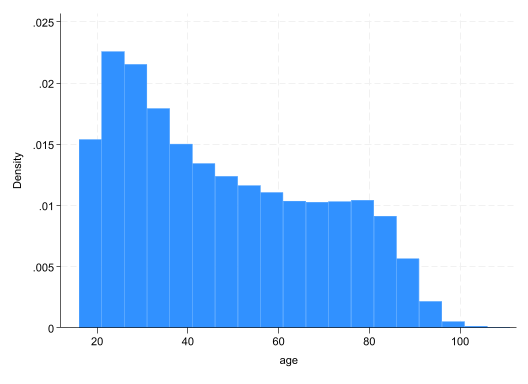

In [4]:
histogram age, width(5)


This table holds one randomly selected diagnostic code found during the observation period. The table is truncated to only include diagnostic codes with a count of 10 or more.

In [5]:
set linesize 132
groups description , select(f >= 10) ord(h) table 


  +---------------------------------------------------------+
  |                   description   Freq.   Percent     %<= |
  |---------------------------------------------------------|
  |                Hypothyroidism    3574     52.11   52.11 |
  |       Acquired hypothyroidism    2055     29.96   82.07 |
  |    Subclinical hypothyroidism     423      6.17   88.23 |
  |            Hypothyroidism NOS     223      3.25   91.49 |
  |                        Goiter      88      1.28   92.77 |
  |---------------------------------------------------------|
  |  Hypothyroid goiter, acquired      72      1.05   93.82 |
  | Other acquired hypothyroidism      69      1.01   94.82 |
  |                    Goitre NOS      38      0.55   95.38 |
  |                        Goitre      28      0.41   95.79 |
  |    Disorders of thyroid gland      26      0.38   96.17 |
  |---------------------------------------------------------|
  |     Autoimmune hypothyroidism      25      0.36   96.53 |
  |   P

These tables holds one randomly selected prescrption during the observation period. The table is truncated to only include codes with a count of 10 or more.


In [6]:
set linesize 132
groups bnf_code , select(f >= 10) ord(h) table 


  +--------------------------------------------+
  |         bnf_code   Freq.   Percent     %<= |
  |--------------------------------------------|
  | Thyroid hormones   19285     99.96   99.96 |
  +--------------------------------------------+


### Results
#### Overall

In [7]:
diagt diag test


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     6,312        547 |     6,859 
    Normal |    12,980    405,161 |   418,141 
-----------+----------------------+----------
     Total |    19,292    405,708 |   425,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.6%      1.6%       1.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     92.0%     91.4%     92.7%
Specificity                      Pr(-|N)     96.9%     96.8%     96.9%
ROC area               (Sens. + Spec.)/2      0.94      0.94      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     29.65     29.

#### Males

In [8]:
diagt diag test if sex==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,384        150 |     1,534 
    Normal |     2,590    204,161 |   206,751 
-----------+----------------------+----------
     Total |     3,974    204,311 |   208,285 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.7%      0.7%       0.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     90.2%     88.6%     91.7%
Specificity                      Pr(-|N)     98.7%     98.7%     98.8%
ROC area               (Sens. + Spec.)/2      0.94      0.94      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     72.02     69.

#### Females

In [9]:
diagt diag test if sex==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,928        397 |     5,325 
    Normal |    10,389    200,992 |   211,381 
-----------+----------------------+----------
     Total |    15,317    201,389 |   216,706 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.5%      2.4%       2.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     92.5%     91.8%     93.2%
Specificity                      Pr(-|N)     95.1%     95.0%     95.2%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     18.83     18.

#### Age
*16-29*

In [10]:
diagt diag test if agecat==16


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       537         82 |       619 
    Normal |       507    116,548 |   117,055 
-----------+----------------------+----------
     Total |     1,044    116,630 |   117,674 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.5%      0.5%       0.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     86.8%     83.8%     89.3%
Specificity                      Pr(-|N)     99.6%     99.5%     99.6%
ROC area               (Sens. + Spec.)/2      0.93      0.92      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    200.29    182.

*30-69*

In [11]:
diagt diag test if agecat==30


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,183        293 |     3,476 
    Normal |     5,744    212,175 |   217,919 
-----------+----------------------+----------
     Total |     8,927    212,468 |   221,395 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.6%      1.5%       1.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     91.6%     90.6%     92.5%
Specificity                      Pr(-|N)     97.4%     97.3%     97.4%
ROC area               (Sens. + Spec.)/2      0.94      0.94      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     34.74     33.

In [12]:
diagt diag test if agecat==70


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,592        172 |     2,764 
    Normal |     6,729     76,438 |    83,167 
-----------+----------------------+----------
     Total |     9,321     76,610 |    85,931 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      3.2%      3.1%       3.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     93.8%     92.8%     94.6%
Specificity                      Pr(-|N)     91.9%     91.7%     92.1%
ROC area               (Sens. + Spec.)/2      0.93      0.92      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     11.59     11.

#### Year at start of oberservation period 
*2004-2009*

In [13]:
diagt diag test if yearcat==2004


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,886        136 |     3,022 
    Normal |     4,149    142,829 |   146,978 
-----------+----------------------+----------
     Total |     7,035    142,965 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.0%      1.9%       2.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     95.5%     94.7%     96.2%
Specificity                      Pr(-|N)     97.2%     97.1%     97.3%
ROC area               (Sens. + Spec.)/2      0.96      0.96      0.97 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     33.83     32.

*2010-2015*

In [14]:
diagt diag test if yearcat==2010


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,114        207 |     2,321 
    Normal |     4,721    142,958 |   147,679 
-----------+----------------------+----------
     Total |     6,835    143,165 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.5%      1.5%       1.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     91.1%     89.8%     92.2%
Specificity                      Pr(-|N)     96.8%     96.7%     96.9%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     28.49     27.

*2016-2020*

In [15]:
diagt diag test if yearcat==2016


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,312        204 |     1,516 
    Normal |     4,110    119,374 |   123,484 
-----------+----------------------+----------
     Total |     5,422    119,578 |   125,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.2%      1.2%       1.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     86.5%     84.7%     88.2%
Specificity                      Pr(-|N)     96.7%     96.6%     96.8%
ROC area               (Sens. + Spec.)/2      0.92      0.91      0.92 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     26.00     25.

#### IMD of practice
*1-3*

In [16]:
diagt diag test if imdcat==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,998        194 |     2,192 
    Normal |     4,197    148,162 |   152,359 
-----------+----------------------+----------
     Total |     6,195    148,356 |   154,551 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.4%      1.4%       1.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     91.1%     89.9%     92.3%
Specificity                      Pr(-|N)     97.2%     97.2%     97.3%
ROC area               (Sens. + Spec.)/2      0.94      0.94      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     33.09     32.

*4-7*

In [17]:
diagt diag test if imdcat==4


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,281        150 |     2,431 
    Normal |     5,113    135,501 |   140,614 
-----------+----------------------+----------
     Total |     7,394    135,651 |   143,045 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.7%      1.6%       1.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     93.8%     92.8%     94.8%
Specificity                      Pr(-|N)     96.4%     96.3%     96.5%
ROC area               (Sens. + Spec.)/2      0.95      0.95      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     25.80     25.

*8-10*

In [18]:
diagt diag test if imdcat==8


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,014        196 |     2,210 
    Normal |     3,664    118,941 |   122,605 
-----------+----------------------+----------
     Total |     5,678    119,137 |   124,815 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.7%       1.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     91.1%     89.9%     92.3%
Specificity                      Pr(-|N)     97.0%     96.9%     97.1%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     30.49     29.

#### Commissioning Regions
EAST OF ENGLAND

In [19]:
diagt diag test if regexm(region_name,"ENGLAND")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,350        111 |     1,461 
    Normal |     3,384     84,792 |    88,176 
-----------+----------------------+----------
     Total |     4,734     84,903 |    89,637 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.6%      1.5%       1.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     92.4%     90.9%     93.7%
Specificity                      Pr(-|N)     96.2%     96.0%     96.3%
ROC area               (Sens. + Spec.)/2      0.94      0.94      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     24.08     23.

London

In [20]:
diagt diag test if regexm(region_name,"LONDON")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       239         65 |       304 
    Normal |       249     16,172 |    16,421 
-----------+----------------------+----------
     Total |       488     16,237 |    16,725 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.6%       2.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     78.6%     73.6%     83.1%
Specificity                      Pr(-|N)     98.5%     98.3%     98.7%
ROC area               (Sens. + Spec.)/2      0.89      0.86      0.91 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     51.85     45.

Midlands

In [21]:
diagt diag test if regexm(region_name,"MID")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       863         68 |       931 
    Normal |     1,357     44,255 |    45,612 
-----------+----------------------+----------
     Total |     2,220     44,323 |    46,543 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.0%      1.9%       2.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     92.7%     90.8%     94.3%
Specificity                      Pr(-|N)     97.0%     96.9%     97.2%
ROC area               (Sens. + Spec.)/2      0.95      0.94      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     31.16     29.

Yorkshire

In [22]:
diagt diag test if regexm(region_name,"YORK")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       966        101 |     1,067 
    Normal |     2,538     82,506 |    85,044 
-----------+----------------------+----------
     Total |     3,504     82,607 |    86,111 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.2%      1.2%       1.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     90.5%     88.6%     92.2%
Specificity                      Pr(-|N)     97.0%     96.9%     97.1%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     30.34     29.

North West

In [23]:
diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       812         57 |       869 
    Normal |       967     45,757 |    46,724 
-----------+----------------------+----------
     Total |     1,779     45,814 |    47,593 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.7%       2.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     93.4%     91.6%     95.0%
Specificity                      Pr(-|N)     97.9%     97.8%     98.1%
ROC area               (Sens. + Spec.)/2      0.96      0.95      0.97 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     45.15     42.

South East

In [24]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,407         93 |     1,500 
    Normal |     2,528     86,457 |    88,985 
-----------+----------------------+----------
     Total |     3,935     86,550 |    90,485 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.7%      1.6%       1.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     93.8%     92.5%     95.0%
Specificity                      Pr(-|N)     97.2%     97.0%     97.3%
ROC area               (Sens. + Spec.)/2      0.95      0.95      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     33.02     31.

South West

In [25]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       526         40 |       566 
    Normal |     1,542     34,068 |    35,610 
-----------+----------------------+----------
     Total |     2,068     34,108 |    36,176 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.6%      1.4%       1.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     92.9%     90.5%     94.9%
Specificity                      Pr(-|N)     95.7%     95.5%     95.9%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     21.46     20.

#### System
SystmOne

In [26]:
diagt diag test if regexm(system,"One")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,913        270 |     3,183 
    Normal |     8,191    217,381 |   225,572 
-----------+----------------------+----------
     Total |    11,104    217,651 |   228,755 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.4%      1.3%       1.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     91.5%     90.5%     92.5%
Specificity                      Pr(-|N)     96.4%     96.3%     96.4%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     25.20     24.

Vision

In [27]:
diagt diag test if regexm(system,"Vision")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       159         15 |       174 
    Normal |       484     13,086 |    13,570 
-----------+----------------------+----------
     Total |       643     13,101 |    13,744 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.3%      1.1%       1.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     91.4%     86.2%     95.1%
Specificity                      Pr(-|N)     96.4%     96.1%     96.7%
ROC area               (Sens. + Spec.)/2      0.94      0.92      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     25.62     23.

EMIS

In [28]:
diagt diag test if regexm(ustrupper(system),"EMIS")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,239        262 |     3,501 
    Normal |     4,297    174,567 |   178,864 
-----------+----------------------+----------
     Total |     7,536    174,829 |   182,365 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.9%      1.9%       2.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     92.5%     91.6%     93.4%
Specificity                      Pr(-|N)     97.6%     97.5%     97.7%
ROC area               (Sens. + Spec.)/2      0.95      0.95      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     38.51     37.

#### RA_Index
Index==1

In [29]:
diagt diag test if RA_index==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,808        441 |     5,249 
    Normal |     9,334    307,114 |   316,448 
-----------+----------------------+----------
     Total |    14,142    307,555 |   321,697 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.6%      1.6%       1.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     91.6%     90.8%     92.3%
Specificity                      Pr(-|N)     97.1%     97.0%     97.1%
ROC area               (Sens. + Spec.)/2      0.94      0.94      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     31.05     30.

Index==0

In [30]:
diagt diag test if RA_index==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,504        106 |     1,610 
    Normal |     3,646     98,047 |   101,693 
-----------+----------------------+----------
     Total |     5,150     98,153 |   103,303 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.6%      1.5%       1.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     93.4%     92.1%     94.6%
Specificity                      Pr(-|N)     96.4%     96.3%     96.5%
ROC area               (Sens. + Spec.)/2      0.95      0.94      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     26.06     25.

#### Ethnicity
Ethnicity==0000white

In [31]:
diagt diag test if ethnicity=="0white"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,375        363 |     4,738 
    Normal |     9,477    243,766 |   253,243 
-----------+----------------------+----------
     Total |    13,852    244,129 |   257,981 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.8%       1.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     92.3%     91.5%     93.1%
Specificity                      Pr(-|N)     96.3%     96.2%     96.3%
ROC area               (Sens. + Spec.)/2      0.94      0.94      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     24.67     24.

In [32]:
diagt diag test if ethnicity=="Other"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       417         88 |       505 
    Normal |       668     42,695 |    43,363 
-----------+----------------------+----------
     Total |     1,085     42,783 |    43,868 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.2%      1.1%       1.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     82.6%     79.0%     85.8%
Specificity                      Pr(-|N)     98.5%     98.3%     98.6%
ROC area               (Sens. + Spec.)/2      0.91      0.89      0.92 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     53.60     49.

In [33]:
diagt diag test if ethnicity=="Missing"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,520         96 |     1,616 
    Normal |     2,835    118,700 |   121,535 
-----------+----------------------+----------
     Total |     4,355    118,796 |   123,151 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.3%      1.2%       1.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.1%     92.8%     95.2%
Specificity                      Pr(-|N)     97.7%     97.6%     97.8%
ROC area               (Sens. + Spec.)/2      0.96      0.95      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     40.32     38.

In [34]:
tempname memhold
postfile `memhold' str20 var prev sens spec ppv npv roc using "validity.dta",replace

quietly diagt diag test
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("all") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Male") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Female") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==16
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age young") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==30
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age middle") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==70
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age elderly") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if yearcat==2004
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2004-2009") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if yearcat==2010
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2010-2015") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc')

quietly diagt diag test if yearcat==2016
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2016-2020") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if imdcat==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 1,3") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==4
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 4,7") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==8
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 8,10") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if regexm(region_name,"LONDON")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("London") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"MID")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Midlands") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"YORK")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Yorkshire") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("North West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South East") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"One")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("SystemOne") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"Vision")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Vision") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(ustrupper(system),"EMIS")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("EMIS") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex1") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex0") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="0white"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_0white") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="Other"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Other") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 



quietly diagt diag test if ethnicity=="Missing"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Missing") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

postclose `memhold'

### Logistic Regression
#### PPV

In [35]:
drop if missing(imdcat)
drop if missing(sex)

(2,589 observations deleted)
(9 observations deleted)


In [36]:
logistic diag_pos if test==1


Logistic regression                                    Number of obs =  19,266
                                                       LR chi2(0)    =   -0.00
                                                       Prob > chi2   =       .
Log likelihood = -12171.716                            Pseudo R2     = -0.0000

------------------------------------------------------------------------------
    diag_pos |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   .4850844   .0074518   -47.09   0.000     .4706967    .4999119
------------------------------------------------------------------------------


In [37]:
gen newdiag=diag_pos

melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model1


Fitting fixed-effects model:

Iteration 0:  Log likelihood = -11509.973  
Iteration 1:  Log likelihood = -11499.399  
Iteration 2:  Log likelihood = -11499.395  
Iteration 3:  Log likelihood = -11499.395  

Refining starting values:

Grid node 0:  Log likelihood = -10786.476

Fitting full model:

Iteration 0:  Log likelihood = -10786.476  
Iteration 1:  Log likelihood = -10772.043  
Iteration 2:  Log likelihood = -10766.425  
Iteration 3:  Log likelihood = -10766.385  
Iteration 4:  Log likelihood = -10766.384  

Mixed-effects logistic regression               Number of obs     =     19,199
Group variable: practice_id                     Number of groups  =        318

                                                Obs per group:
                                                              min =          1
                                                              avg =       60.4
                                                              max =        493

Integration method: 

##### Likelihood ratio tests

In [38]:


quietly: melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic if test==1 || practice_id:,or
estimates store model_imd

quietly:melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.imdcat if test==1 || practice_id:,or
estimates store model_ethnicity

quietly:melogit newdiag i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_sex

quietly:melogit newdiag i.sex i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_year

quietly: melogit newdiag i.sex i.yearcat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_age



In [39]:
lrtest model1 model_sex
lrtest model1 model_year
lrtest model1 model_age
lrtest model1 model_ethnicity
lrtest model1 model_imd



Likelihood-ratio test
Assumption: model_sex nested within model1

 LR chi2(1) =  27.07
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_year nested within model1

 LR chi2(2) = 531.52
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_age nested within model1

 LR chi2(2) = 358.29
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_ethnic~y nested within model1

 LR chi2(2) =   6.54
Prob > chi2 = 0.0381

Likelihood-ratio test
Assumption: model_imd nested within model1

 LR chi2(2) =   0.73
Prob > chi2 = 0.6943


#### NPV

In [40]:
logistic diag_neg if test==0


Logistic regression                                    Number of obs = 403,136
                                                       LR chi2(0)    =    0.00
                                                       Prob > chi2   =       .
Log likelihood = -4111.9866                            Pseudo R2     =  0.0000

------------------------------------------------------------------------------
    diag_neg |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   745.5481   32.10479   153.60   0.000     685.2062    811.2041
------------------------------------------------------------------------------


In [41]:
/* need to use the same response variable (newdiag) to line up the two model results */
replace newdiag=diag_neg 

melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2

(422,402 real changes made)

Fitting fixed-effects model:

Iteration 0:  Log likelihood = -35390.069  
Iteration 1:  Log likelihood = -4271.3171  
Iteration 2:  Log likelihood = -4054.7803  
Iteration 3:  Log likelihood =  -3919.757  
Iteration 4:  Log likelihood = -3915.0121  
Iteration 5:  Log likelihood = -3914.9675  
Iteration 6:  Log likelihood = -3914.9675  

Refining starting values:

Grid node 0:  Log likelihood = -3923.1203

Fitting full model:

Iteration 0:  Log likelihood = -3923.1203  (not concave)
Iteration 1:  Log likelihood = -3902.8767  
Iteration 2:  Log likelihood = -3896.2308  
Iteration 3:  Log likelihood = -3895.3286  
Iteration 4:  Log likelihood = -3895.3231  
Iteration 5:  Log likelihood = -3895.3231  

Mixed-effects logistic regression               Number of obs     =    402,234
Group variable: practice_id                     Number of groups  =        336

                                                Obs per group:
                                         

##### Likelihood ratio tests

In [42]:

quietly: melogit newdiag i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_sex
quietly: melogit newdiag i.sex i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_year
quietly: melogit newdiag i.sex i.yearcat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_age
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.imdcat if test==0 || practice_id:,or
estimates store model2_ethnicity
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic if test==0 || practice_id:,or
estimates store model2_imd


In [43]:
lrtest model2 model2_sex
lrtest model2 model2_year
lrtest model2 model2_age
lrtest model2 model2_ethnicity
lrtest model2 model2_imd



Likelihood-ratio test
Assumption: model2_sex nested within model2

 LR chi2(1) = 113.27
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_year nested within model2

 LR chi2(2) =  18.93
Prob > chi2 = 0.0001

Likelihood-ratio test
Assumption: model2_age nested within model2

 LR chi2(2) = 113.96
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_ethni~y nested within model2

 LR chi2(2) =  24.78
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_imd nested within model2

 LR chi2(2) =   4.13
Prob > chi2 = 0.1270


In [44]:
etable, estimates(model1 model2) showstars showstarsnote title("Table 2. PPV (1) and NPV (2),  OR, Random effect") cstat(_r_b,nformat(%6.2f)) column(index) export(validity2.xlsx, modify sheet(reg_thyroid, replace))


Table 2. PPV (1) and NPV (2), OR, Random effect
-------------------------------------------------------------------
                                                    1         2    
-------------------------------------------------------------------
sex_coded                                                          
  1                                              1.24 **    2.66 **
yearcat                                                            
  2010-2015                                      0.55 **    0.70 **
  2016-2020                                      0.35 **    0.60 **
agecat                                                             
  0Middle                                        0.45 **    0.44 **
  Elderly                                        0.28 **    0.24 **
region                                                             
  LONDON COMMISSIONING REGION                    2.21 *     0.54 * 
  MIDLANDS COMMISSIONING REGION                  1.71 **    0.83   

### Summary of validation parameters

In [45]:
use validity.dta, clear
replace prev=round(prev, 0.1)
gen prev_a=round(((prev/100)*((sens/100)+(spec/100)-1)+1-(spec/100))*100,0.1)/*apparent prevalence*/
replace sens=round(sens, 0.1)
replace spec=round(spec,0.1)
replace ppv=round(ppv, 0.1)
replace npv=round(npv, 0.1)
replace roc=round(roc, 0.01)


(26 real changes made)
(25 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)


In [46]:
%head 50

,var,prev,sens,spec,ppv,npv,roc,prev_a
1,all,1.6,92,96.9,32.7,99.9,.94,4.5
2,Male,.7,90.2,98.7,34.8,99.9,.94,1.9
3,Female,2.5,92.5,95.1,32.2,99.8,.94,7.1
4,Age young,.5,86.8,99.6,51.4,99.9,.93,.9
5,Age middle,1.6,91.6,97.4,35.7,99.9,.94,4.1
6,Age elderly,3.2,93.8,91.9,27.8,99.8,.93,10.8
7,Year 2004-2009,2,95.5,97.2,41,99.9,.96,4.7
8,Year 2010-2015,1.5,91.1,96.8,30.9,99.9,.94,4.5
9,Year 2016-2020,1.2,86.5,96.7,24.2,99.8,.92,4.3
10,"IMD 1,3",1.4,91.1,97.2,32.3,99.9,.94,4


In [47]:
/*texsave * using test3.tex, varlabels*/
export excel using  validity2.xlsx, sheet(val_thyroid, replace)

file validity2.xlsx saved
